# Biblioteki + ustawienia:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)

# Wgranie danych:

In [2]:
file = '../Python_cwiczenia/nypd-motor-vehicle-collisions.csv'
#kolumny:
cols=['ACCIDENT DATE', 'ACCIDENT TIME', 'BOROUGH','ON STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1']
df = pd.read_csv(file,usecols=cols)

# Wstępne przejrzenie danych:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612178 entries, 0 to 1612177
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ACCIDENT DATE                  1612178 non-null  object 
 1   ACCIDENT TIME                  1612178 non-null  object 
 2   BOROUGH                        1127553 non-null  object 
 3   ON STREET NAME                 1298002 non-null  object 
 4   NUMBER OF PERSONS INJURED      1612161 non-null  float64
 5   NUMBER OF PERSONS KILLED       1612145 non-null  float64
 6   NUMBER OF PEDESTRIANS INJURED  1612178 non-null  int64  
 7   NUMBER OF PEDESTRIANS KILLED   1612178 non-null  int64  
 8   NUMBER OF CYCLIST INJURED      1612178 non-null  int64  
 9   NUMBER OF CYCLIST KILLED       1612178 non-null  int64  
 10  NUMBER OF MOTORIST INJURED     1612178 non-null  int64  
 11  NUMBER OF MOTORIST KILLED      1612178 non-null  int64  
 12  CONTRIBUTING F

In [4]:
df.head()

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1
0,2019-08-05T00:00:00.000,16:30,QUEENS,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,4184637,Sedan
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,4195773,Station Wagon/Sport Utility Vehicle
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,CHRYSTIE STREET,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,4202457,Sedan
3,2019-08-30T00:00:00.000,21:53,BRONX,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,4198749,Taxi
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,EAST 35 STREET,1.0,0.0,0,0,1,0,0,0,Driver Inattention/Distraction,4183798,Station Wagon/Sport Utility Vehicle


# Modyfikacje danych

## dodanie kolumny DateTime:

In [5]:
def date_time_col():
    if 'ACCIDENT DATE' in df.columns:
        df['ACCIDENT DATE'] = df['ACCIDENT DATE'].apply(lambda x: x.split('T')[0])
        #Zmiana Dtype na Datetime dla daty i godziny:
        df['ACCIDENT DATE'] = df['ACCIDENT DATE']+df['ACCIDENT TIME']
        df['ACCIDENT DATE'] = pd.to_datetime(df['ACCIDENT DATE'],format='%Y-%m-%d%H:%M')
        #Zmiana nazwy kolumnyt ACCIDENT DATE:
        df.rename(columns={'ACCIDENT DATE':'ACCIDENT DATE AND TIME'}, inplace = True)
        print(f'Dodano kolumnę "ACCIDENT DATE AND TIME".')
    else:
        print('Już było robione')
        
date_time_col()

Dodano kolumnę "ACCIDENT DATE AND TIME".


## Dodanie dnia tygodnia i miesiąca

In [6]:
def weekday_month_cols():
    #dzień tygodnia
    if 'WEEKDAY' in df.columns:
        print('Kolumna "WEEKDAY" już istnieje')
    else:
        df.rename(columns={'ACCIDENT TIME':'WEEKDAY'}, inplace = True)
        df['WEEKDAY'] = df['ACCIDENT DATE AND TIME'].dt.dayofweek
        df['WEEKDAY'] = df['WEEKDAY'].map({0:'Monday',1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday',6:'Sunday'})
        print('Dodano kolumnę "WEEKDAY"')

    # miesiąc
    if 'MONTH' in df.columns:
        print('Kolumna "MONTH" już istnieje')
    else:
        month = df['ACCIDENT DATE AND TIME'].dt.month
        df.insert(2, 'MONTH', month)
        print('Dodano kolumnę "MONTH"')
    
weekday_month_cols()    

Dodano kolumnę "WEEKDAY"
Dodano kolumnę "MONTH"


## Usunięcie duplikatów

In [7]:
def drop_duplicates():
    #Usunięcie duplikatów całych wierszy:
    df.drop_duplicates(inplace=True)
    # Usunięcie duplikatów po Collision ID:
    df.drop_duplicates(subset = 'COLLISION_ID',inplace=True)
    print('Usunięto duplikaty.')
drop_duplicates()

Usunięto duplikaty.


## Usunięcie NaN:

In [8]:
# Zmiana NaN w tekstowych na missing
def change_nan():
    df['BOROUGH'] = df['BOROUGH'].fillna('Missing BOROUGH')
    df['ON STREET NAME'] = df['ON STREET NAME'].fillna('Missing')
change_nan()

## Sprzawdzenie czy sumy rannych i zabitych się zgadzają:

In [9]:
#sprawdzenie rannych:
def validate_injured():
    #sprawdzenie czy się zgadzajć
    injured_compare = df[(df['NUMBER OF PERSONS INJURED'] == df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF MOTORIST INJURED'])==False]
    if len(injured_compare) == 0:
        print('Jest OK!')
    else:
        #poprawka:
        a = df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF MOTORIST INJURED']
        df['NUMBER OF PERSONS INJURED'] = a
        print('Poprawiono')
validate_injured()

Poprawiono


In [10]:
#sprawdzenie zabitych:
def validate_killed():
    killed_compare = df[(df['NUMBER OF PERSONS KILLED'] == df['NUMBER OF PEDESTRIANS KILLED'] + df['NUMBER OF CYCLIST KILLED'] + df['NUMBER OF MOTORIST KILLED'])==False]
    if len(killed_compare) == 0:
        print('Jest OK!')
    else:
        df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PEDESTRIANS KILLED'] + df['NUMBER OF CYCLIST KILLED'] + df['NUMBER OF MOTORIST KILLED']
        print('Poprawiono')
validate_killed()

Poprawiono


# Prezentacja danych

## Tabele:

### Tabela z sumą i maksymalną wartością ranny i zabitych, z podziałem na dzielice

In [11]:
def min_max_borough():
    #agg dla zabitych + zmiana nazw kolumn:
    killed = df.groupby('BOROUGH').agg({'NUMBER OF PERSONS KILLED':['sum', 'max']})
    killed.columns = ['Sum of killed:','Most killed in 1 accident:']
    #agg dla rannych + zmiana nazw kolumn:
    injured = df.groupby('BOROUGH').agg({'NUMBER OF PERSONS INJURED':['sum', 'max']})
    injured.columns = ['Sum of injured:','Most injured in 1 accident:']
    #łączenie tabel:
    merged_df = injured.merge(killed, left_on='BOROUGH', right_on='BOROUGH')
    merged_df.drop('Missing BOROUGH',inplace=True)
    
    return merged_df
min_max_borough()

,Sum of injured:,Most injured in 1 accident:,Sum of killed:,Most killed in 1 accident:
BOROUGH,,,,
BRONX,33842,31,123,2
BROOKLYN,76384,24,294,3
MANHATTAN,35432,27,173,8
QUEENS,59363,16,277,5
STATEN ISLAND,9206,17,52,2


### Top 20 przyczyn wypadków:


In [12]:
def top20_factors():
    factor_sum = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
    factor_sum = pd.DataFrame(factor_sum)
    factor_sum.reset_index(inplace=True) 
    #usunięcie Unspecified:
    factor_sum.drop(0,inplace=True) 
    #zmiana nazw kolumn:
    factor_sum = factor_sum.rename(columns = {'index':'Contributing Factor','CONTRIBUTING FACTOR VEHICLE 1':'Sum of accidents'})
    
    return factor_sum.head(20)
top20_factors()

,Contributing Factor,Sum of accidents
1,Driver Inattention/Distraction,229923
2,Failure to Yield Right-of-Way,70014
3,Following Too Closely,61938
4,Backing Unsafely,46924
5,Other Vehicular,38751
6,Fatigued/Drowsy,35101
7,Turning Improperly,31294
8,Passing or Lane Usage Improper,29505
9,Passing Too Closely,26985
10,Unsafe Lane Changing,23763


### Top 20 typów pojazdów biorącyh udział w wypadkach:


In [13]:
def top20_cars():
    car_sum = df['VEHICLE TYPE CODE 1'].value_counts()
    car_sum = pd.DataFrame(car_sum)
    car_sum.reset_index(inplace=True)
    #zmiana nazw kolumn:
    car_sum = car_sum.rename(columns = {'index':'Car Type','VEHICLE TYPE CODE 1':'Sum of accidents'})
    #przesunięcie indexu:
    car_sum.index += 1 
    
    return car_sum.head(20)
top20_cars()

,Car Type,Sum of accidents
1,PASSENGER VEHICLE,525698
2,SPORT UTILITY / STATION WAGON,238078
3,Sedan,126952
4,Station Wagon/Sport Utility Vehicle,103168
5,TAXI,38592
6,VAN,19314
7,PICK-UP TRUCK,17569
8,OTHER,17478
9,UNKNOWN,14738
10,Taxi,13172


---

## Wykresy słupkowe:

### ## Wykres słupkowy pokazujący rannych w danym miesiącu::

In [14]:
#funkcja z komentarzem do wykresu o rannych:
def percent_of_injur():
    count_injur_accidents = len(df[df['NUMBER OF PERSONS INJURED']>0])
    all_accidents = len(df['NUMBER OF PERSONS INJURED'])
    injured_sum = df['NUMBER OF PERSONS INJURED'].sum()
    injured_percent = (injured_sum / len(df)) *100
    
    #komentarz:
    print(f'W {count_injur_accidents} wypadkach (z całkowitej liczby {all_accidents}) byli jacyś ranni.'
          f'\nStanowi to {round(injured_percent,2)}% wypadków.\n'
          f'W sumie było {injured_sum} rannych.')

Liczba wypadków z osobami rannymi w ujęciu miesięcznym:


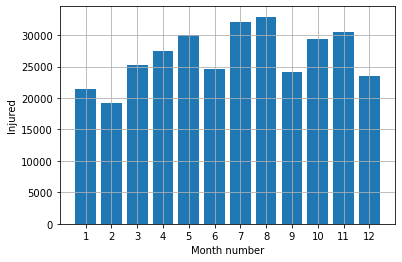

W 235309 wypadkach (z całkowitej liczby 1217957) byli jacyś ranni.
Stanowi to 26.32% wypadków.
W sumie było 320619 rannych.


In [15]:
# Wykres słupkowy z rannymi w danym miesiącu
def injured_bar():
    #data:
    months = range(1,13)
    injur_months = df.groupby(['MONTH']).sum()['NUMBER OF PERSONS INJURED']
    
    #wykres:
    plt.bar(months, injur_months)
    plt.xticks(months)
    plt.grid()
    plt.ylabel('Injured')
    plt.xlabel('Month number')
    
    #show + komentarz:
    print('Liczba wypadków z osobami rannymi w ujęciu miesięcznym:')
    plt.show()
    percent_of_injur()
    
injured_bar()

## Wykres słupkowy pokazujący śmiertelność w danym miesiącu:

In [16]:
#funkcja z komentarzem do wykresu o śmiertelności:
def percent_of_dead():
    count_deadly_accidents = len(df[df['NUMBER OF PERSONS KILLED']>0])
    all_accidents = len(df['NUMBER OF PERSONS KILLED'])
    dead_sum = df['NUMBER OF PERSONS KILLED'].sum()
    dead_percent = (dead_sum / len(df) )*100
    
    #komentarz:
    print(f'W {count_deadly_accidents} wypadkach (z całkowitej liczby {all_accidents}) były ofiary śmiertelne.\nStanowi to {round(dead_percent,2)}%.\n'
          f'W sumie było {dead_sum} ofiar śmiertelnych.')

Ilość śmiertelnych wypdaków w ujęciu miesięcznym:


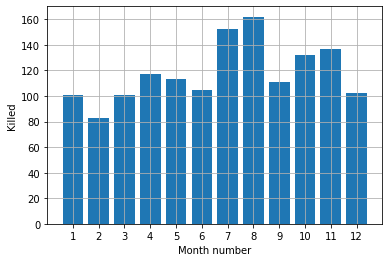

W 1359 wypadkach (z całkowitej liczby 1217957) były ofiary śmiertelne.
Stanowi to 0.12%.
W sumie było 1416 ofiar śmiertelnych.


In [17]:
# Wykres słupkowy z wypadkami śmiertelnymi w danym miesiącu
def killed_bar():
    #data:
    months = range(1,13)
    killed_per_month = df.groupby(['MONTH']).sum()['NUMBER OF PERSONS KILLED']

    #wykres:
    plt.bar(months, killed_per_month)
    plt.xticks(months)
    plt.grid()
    plt.ylabel('Killed')
    plt.xlabel('Month number')

    #show + komentarz:
    print('Ilość śmiertelnych wypdaków w ujęciu miesięcznym:')
    plt.show()
    percent_of_dead()
killed_bar()

## Wykresy kołowe:

### Wykres kołowy pokazujący ile procent rannych przypada na dany miesiąc:

Całkowita liczba rannych: 320619
Rozkład procentowy w ujęciu miesięcznym:


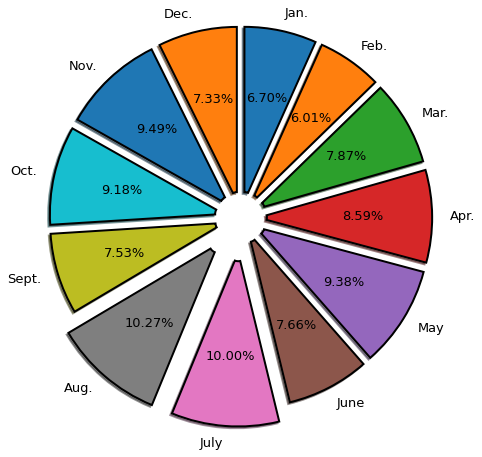

In [18]:
def plotpie_months():
    #data
    months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']
    injured = df.groupby(['MONTH']).sum()['NUMBER OF PERSONS INJURED']
    #wykres:
    explode = [0.2,0.2,0.2,0.2,0.2,0.2,0.4,0.4,0.2,0.2,0.2,0.2]
    plt.pie(injured,
            labels = months, 
            explode = explode,
            autopct = "%0.2f%%",
            shadow = True, 
            radius = 2,
            startangle = 90,
            textprops = {"fontsize":13},
            wedgeprops = {"linewidth": 2, 'width':1.9, "edgecolor":"k"},
            counterclock = False,) 

    #show + komentarz
    print(f'Całkowita liczba rannych: {df["NUMBER OF PERSONS INJURED"].sum()}')
    print("Rozkład procentowy w ujęciu miesięcznym:")
    plt.show()
plotpie_months()

## Wykres liniowy z rozkładem dobowym wypadków:

Rozkład dobowy wypadków:


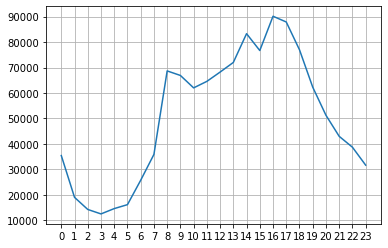

In [19]:
def plot_24h():
    #data:
    df['HOUR'] = df['ACCIDENT DATE AND TIME'].dt.hour
    #wykres:
    plt.plot(range(0,24),df['HOUR'].value_counts(sort=False, ascending=True,).sort_index())
    plt.xticks(range(0,24))
    plt.grid()

    # Show + konetarz:
    print('Rozkład dobowy wypadków:')
    plt.show()
plot_24h()